# Task - 3

# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
Sample Dataset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Load the dataset from a local file

In [2]:
file_path = "C:/Users/HP/Desktop/Prodigy InfoTech/Dataset/Task3/bank-full.csv"
bank_data = pd.read_csv(file_path, sep=';')

In [3]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Preprocess the data

# Encode categorical variables

In [5]:
label_encoder = LabelEncoder()

# Encode target variable

In [6]:
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

# One-hot encode categorical features

In [7]:
bank_data = pd.get_dummies(bank_data) 

# Split the data into features and target variable

In [8]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree classifier

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Evaluate the classifier

In [12]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8959416122968041


# Print classification report and confusion matrix

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
[[7777  175]
 [ 766  325]]


# Visualize the decision tree

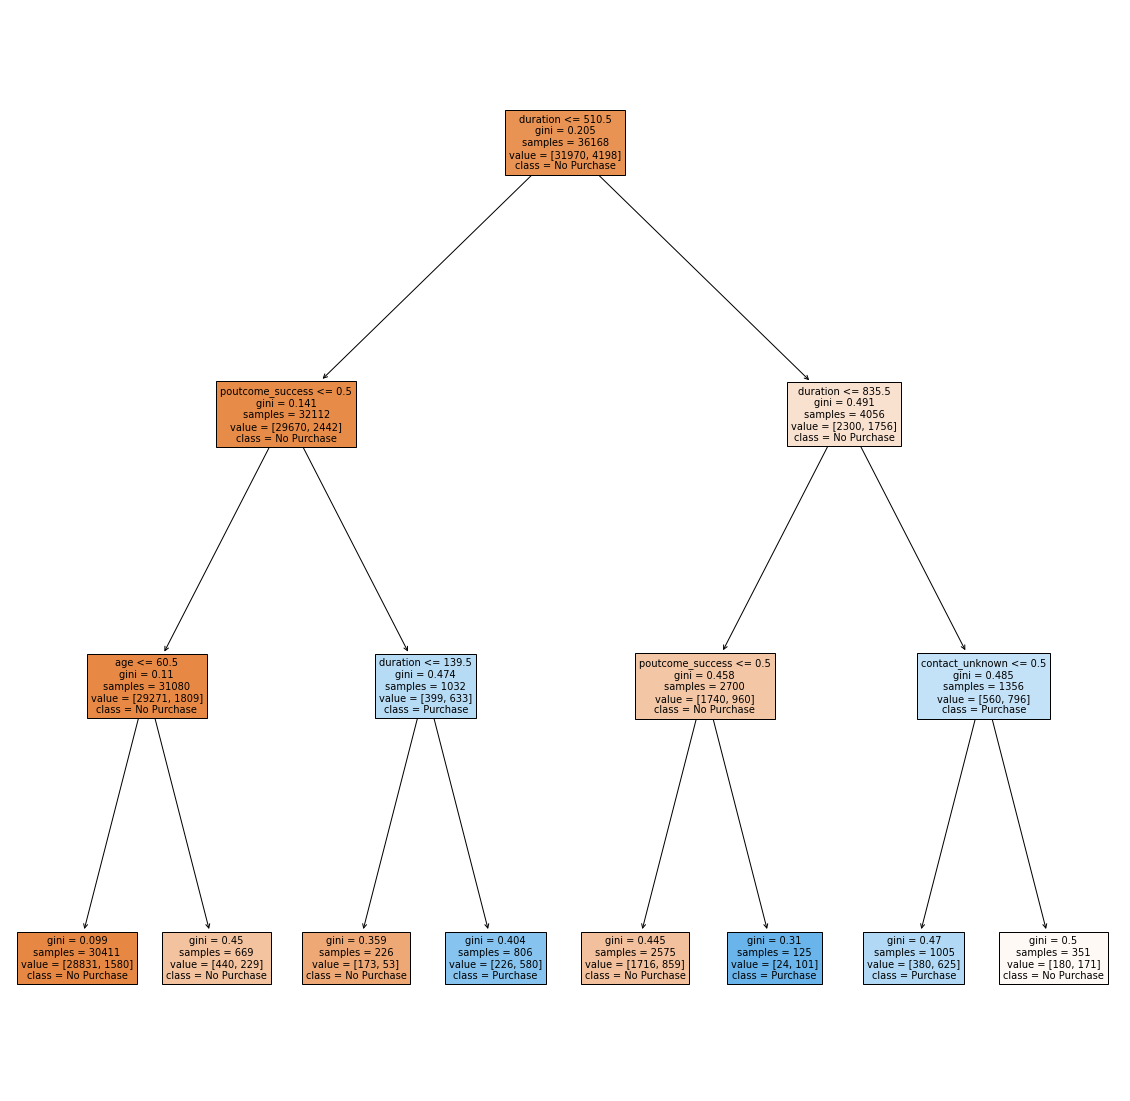

In [14]:
plt.figure(figsize=(20, 20))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()

# Conclusion 

The program employs a decision tree classifier to predict customer purchasing behavior based on demographic and behavioral data from the Bank Marketing dataset. It begins by loading the dataset from a local file and preprocessing it, encoding categorical variables to prepare for modeling. Using a decision tree classifier with a limited depth to avoid overfitting, the model is trained on the preprocessed training data. Evaluation on the testing data reveals the classifier's accuracy, detailed through a classification report and confusion matrix. Additionally, a visualization of the decision tree offers insights into the factors influencing purchasing decisions. This analysis aids marketers and businesses in understanding customer behavior and informs strategic decisions aimed at improving sales and customer engagement.